**IMPORT LIBRARY**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings 
warnings.simplefilter('ignore')

**LOADING DATA**

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**VISUALIZATION**

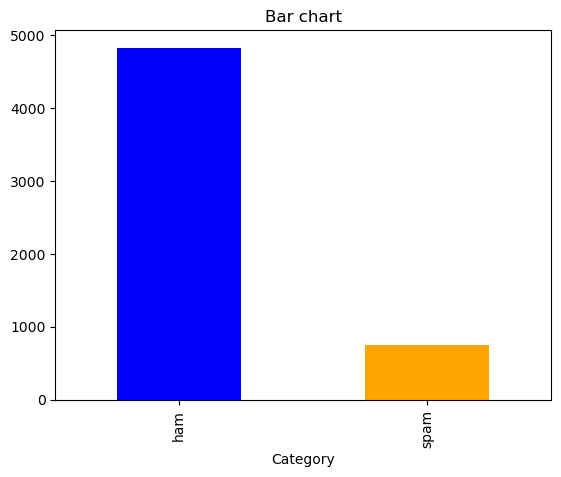

In [4]:
count_Class=pd.value_counts(df["Category"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

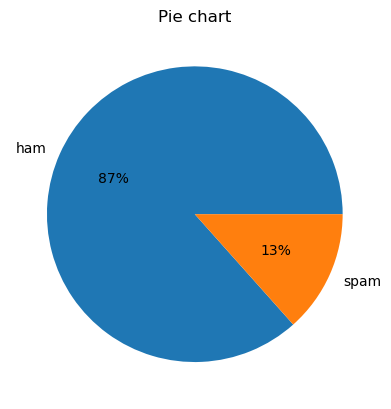

In [5]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

**EXPLORATORY DATA ANALYSIS**

In [6]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5572, 2)

In [8]:
df.dtypes

Category    object
Message     object
dtype: object

In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
df.duplicated().sum()

415

In [11]:
df =df. drop_duplicates(df)

**CATEGORY COLUMN PREPROCESSING** 

In [12]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['Category'] = df['Category'].replace({'spam': 1, 'ham': 0})

In [14]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**SPLITTING DATA INTO TARGET AND FEATURE VARIABLE**

In [15]:
x = df['Message']
y= df['Category']

In [16]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.3 , random_state =1)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [18]:
x_train.shape

(3609, 7128)

In [19]:
x_test.shape

(1548, 7128)

In [20]:
y_train.shape

(3609,)

In [21]:
y_test.shape

(1548,)

**BUILDING THE MODEL**

In [22]:
from sklearn.naive_bayes import MultinomialNB # using Gaussian algorithm from Naive Bayes

model = MultinomialNB(alpha=1.0, force_alpha='warn', fit_prior=True).fit(x_train,y_train)
model.fit(x_train,y_train)

MultinomialNB()

In [23]:
y_predict = model.predict(x_test)

In [24]:
from  sklearn.metrics  import accuracy_score
print("The accuracy is",accuracy_score(y_test,y_predict)*100)

The accuracy is 94.76744186046511


**FINAL ANALYSIS OF MODEL PERFORMANCE**

Confusion Matrix


<IPython.core.display.Javascript object>

<Axes: >

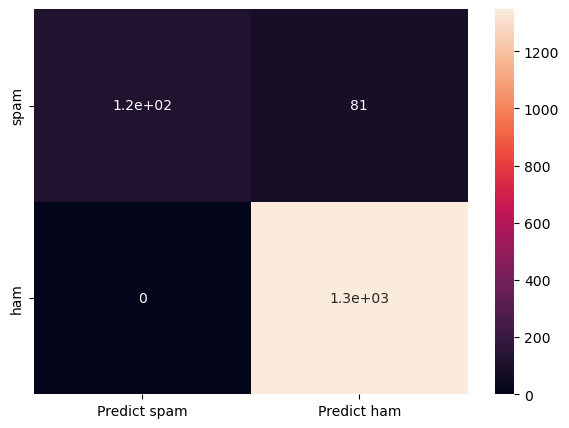

In [25]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test,y_predict,labels=[1,0])

df_cm = pd.DataFrame(cm,index=[i for i in ["spam","ham"]],
                    columns = [i for i in ["Predict spam","Predict ham"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

In [26]:
from sklearn.metrics import classification_report

print("Classification report")
print(metrics.classification_report(y_test,y_predict,labels=[1,0]))

Classification report


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           1       1.00      0.60      0.75       201
           0       0.94      1.00      0.97      1347

    accuracy                           0.95      1548
   macro avg       0.97      0.80      0.86      1548
weighted avg       0.95      0.95      0.94      1548

